In [14]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

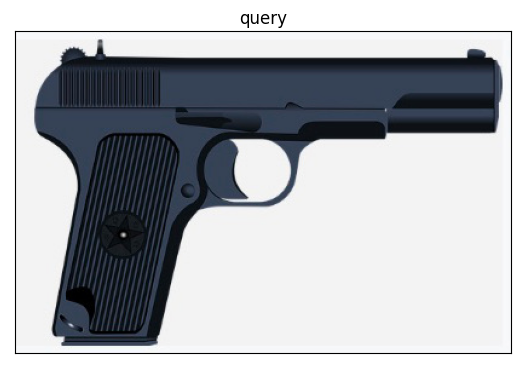

In [15]:
# Read and display image
img = cv2.imread('./img/pistol.jpg')
# cv2.imshow('query', img)
plt.imshow(img[:,:,::-1])
plt.title('query')
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
# Path to the images to be compared
search_dir = './img/101_ObjectCategories'

In [17]:
# Convert the image to an average hash with a size of 16 x 16
def img2hash(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, (16, 16))
    avg = gray.mean()
    bi = 1 * (gray > avg)
    return bi

# Hamming distance measurement function
def hamming_distance(a, b):
    a = a.reshape(1, -1)
    b = b.reshape(1, -1)
    # Sum of values that are different from each other in the same position
    distance = (a != b).sum()
    return distance

In [18]:
# Get the hash of a pistol image
query_hash = img2hash(img)

In [27]:
# Path of all image files in the image dataset directory
img_path = glob.glob(search_dir+'/**/*.jpg')

In [22]:
img2 = cv2.imread('./img/pistol.jpg')
cv2.imshow('query', img2)
img_list = []
img_list.append(img2)
for path in img_path:
    # Read and display one image from the dataset
    img = cv2.imread(path)
    cv2.imshow('searching...', img)
    cv2.waitKey(5)
    # Calculate the hash of one image from the dataset
    a_hash = img2hash(img)
    # Calculate the Hamming distance
    dst = hamming_distance(query_hash, a_hash)
    if dst/256 < 0.25:    # Print within the Hamming distance of 25%
        print(path, dst/256)
        img_list.append(img)
        cv2.imshow(path, img)
cv2.destroyWindow('searching...')
cv2.waitKey()
cv2.destroyAllWindows()

./img/101_ObjectCategories\BACKGROUND_Google\image_0398.jpg 0.234375
./img/101_ObjectCategories\binocular\image_0011.jpg 0.23828125
./img/101_ObjectCategories\Faces_easy\image_0419.jpg 0.2421875
./img/101_ObjectCategories\revolver\image_0001.jpg 0.2421875
./img/101_ObjectCategories\revolver\image_0015.jpg 0.24609375
./img/101_ObjectCategories\revolver\image_0017.jpg 0.23828125
./img/101_ObjectCategories\revolver\image_0018.jpg 0.1953125
./img/101_ObjectCategories\revolver\image_0019.jpg 0.23828125
./img/101_ObjectCategories\revolver\image_0021.jpg 0.171875
./img/101_ObjectCategories\revolver\image_0022.jpg 0.21484375
./img/101_ObjectCategories\revolver\image_0023.jpg 0.21875
./img/101_ObjectCategories\revolver\image_0031.jpg 0.21875
./img/101_ObjectCategories\revolver\image_0033.jpg 0.2421875
./img/101_ObjectCategories\revolver\image_0034.jpg 0.23046875
./img/101_ObjectCategories\revolver\image_0037.jpg 0.2421875
./img/101_ObjectCategories\revolver\image_0064.jpg 0.18359375
./img/101_O

In [28]:
print(len(img_list))

20


for i, img in enumerate(img_list):
    plt.subplot(4, 5, i+1)
    if i == 0:
        plt.title('original')
    plt.imshow(img[:,:,::-1])
    plt.xticks([])
    plt.yticks([])
plt.show()